# Exercise 2.3 Task

## 02. Import Libraries and Data

In [1]:
# Import Libraries

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt

In [2]:
import matplotlib
matplotlib.__version__

'3.10.6'

In [3]:
# Import Data

df = pd.read_csv('newyork_data.csv', index_col = 0)

In [4]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge'],
      dtype='object')

In [5]:
df.drop(columns = {'_merge'}, inplace = True)

In [6]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
0,CA5837152804D4B5,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26,-2.3
1,BA06A5E45B6601D2,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-28,0.1
2,7B6827D7B9508D93,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-10,1.6
3,6E5864EA6FCEC90D,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26,-2.3
4,E24954255BBDE32D,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-13,4.0


In [7]:
df.shape

(895485, 15)

In [8]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
dtype: object

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
dtype: object

## 03. Temperature Line Plot with Pandas

In [11]:
df_temp = df.set_index('date')

In [12]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp
date,,,,,,,,,,,,,,
2022-01-26,CA5837152804D4B5,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,-2.3
2022-01-28,BA06A5E45B6601D2,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,0.1
2022-01-10,7B6827D7B9508D93,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,1.6
2022-01-26,6E5864EA6FCEC90D,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,-2.3
2022-01-13,E24954255BBDE32D,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,4.0


<Axes: xlabel='date'>

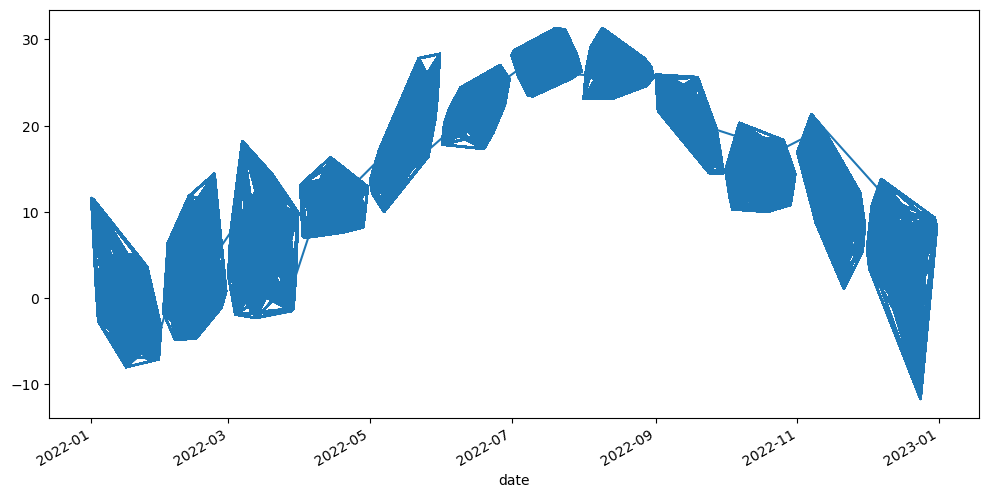

In [13]:
df_temp['avgTemp'].plot(figsize=(12, 6))

<Axes: xlabel='date'>

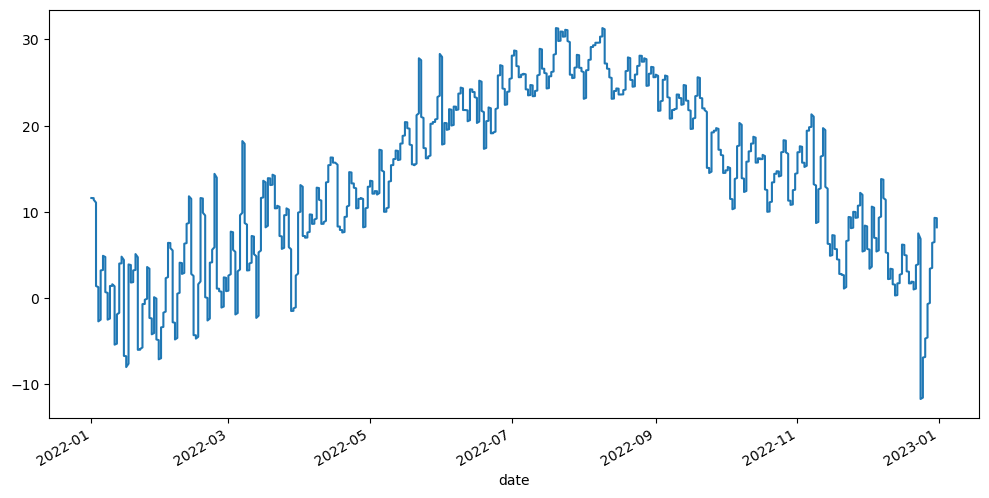

In [22]:
# Additional chart with rolling Average Temperature to smooth out the blocks in the above chart

df_temp['avgTemp'].rolling(30).mean().plot(figsize=(12, 6))

## 04. Merge Trips Data with Weather Dataframe

In [15]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp'],
      dtype='object')

In [16]:
# Groupby the count of the trips 

df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [17]:
df_group.head()

,date,ride_id
0,2022-01-01,592
1,2022-01-02,1248
2,2022-01-03,832
3,2022-01-04,934
4,2022-01-05,914


In [18]:
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)
df = df.merge(df_group, on = "date", how = 'outer', indicator = True)
print(df['_merge'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2022-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '2022-01-02'].shape) # Second check 

df_temp = df.set_index('date')

print(df_temp.columns)

_merge
both          895485
left_only          0
right_only         0
Name: count, dtype: int64
Shape of January 1st is (592, 17)
Shape of January 2nd is (1248, 17)
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'bike_rides_daily', '_merge'],
      dtype='object')


In [19]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,bike_rides_daily,_merge
date,,,,,,,,,,,,,,,,
2022-01-01,115C78C3039FFA89,electric_bike,2022-01-01 09:21:14,2022-01-01 09:35:46,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,11.6,592,both
2022-01-01,7FFD810CAA7A919E,classic_bike,2022-01-01 02:43:56,2022-01-01 02:43:57,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,11.6,592,both
2022-01-01,E715E8432031B72C,classic_bike,2022-01-01 02:13:33,2022-01-01 02:18:42,Essex Light Rail,JC038,Washington St,JC098,40.712774,-74.036486,40.724294,-74.035483,member,11.6,592,both
2022-01-01,BF1B7B1E1961A87B,electric_bike,2022-01-01 17:18:46,2022-01-01 18:55:25,Grand St,JC102,W 27 St & 7 Ave,6247.06,40.715178,-74.037683,40.746647,-73.993915,casual,11.6,592,both
2022-01-01,4A01F0E53C6F4386,electric_bike,2022-01-01 11:23:32,2022-01-01 11:29:27,Christ Hospital,JC034,Hoboken Terminal - Hudson St & Hudson Pl,HB101,40.734786,-74.050444,40.735938,-74.030305,member,11.6,592,both


In [20]:
df_temp.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,bike_rides_daily,_merge
date,,,,,,,,,,,,,,,,
2022-12-31,1C2DA98EA3E22C36,electric_bike,2022-12-31 11:04:03,2022-12-31 11:07:05,Southwest Park - Jackson St & Observer Hwy,HB401,City Hall - Washington St & 1 St,HB105,40.737551,-74.041664,40.737360,-74.030970,casual,8.2,983,both
2022-12-31,15CAD9793CBB48C2,classic_bike,2022-12-31 09:58:06,2022-12-31 10:11:04,Riverview Park,JC057,Manila & 1st,JC082,40.744703,-74.043759,40.721651,-74.042884,casual,8.2,983,both
2022-12-31,D48F644880B431D1,classic_bike,2022-12-31 16:35:25,2022-12-31 17:00:09,Manila & 1st,JC082,Riverview Park,JC057,40.721651,-74.042884,40.744319,-74.043991,casual,8.2,983,both
2022-12-31,1E992E823B5058B7,classic_bike,2022-12-31 16:05:25,2022-12-31 16:12:24,City Hall - Washington St & 1 St,HB105,11 St & Washington St,HB502,40.737360,-74.030970,40.749985,-74.027150,casual,8.2,983,both
2022-12-31,055D6A3EC0CD3E03,classic_bike,2022-12-31 18:00:20,2022-12-31 18:11:33,11 St & Washington St,HB502,City Hall - Washington St & 1 St,HB105,40.749985,-74.027150,40.737360,-74.030970,member,8.2,983,both


## 05. Line Chart with Bike Trips and Temperatures 

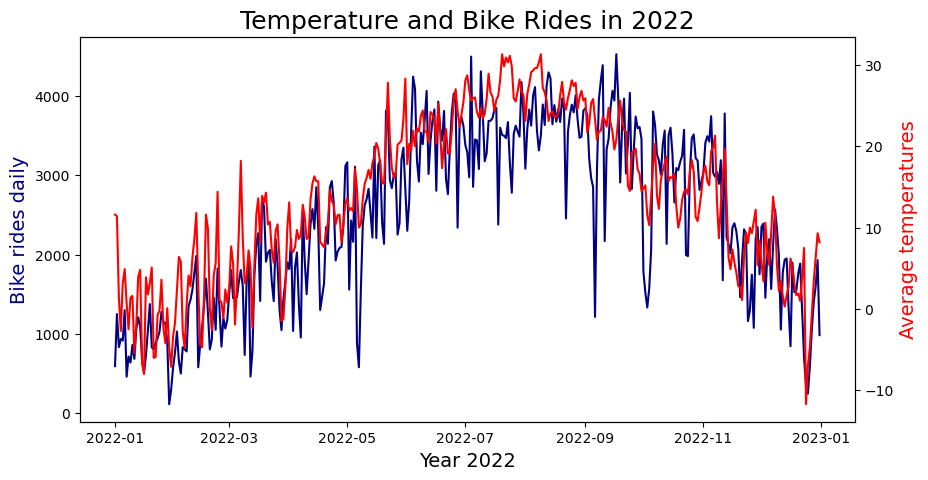

In [21]:
# Create figure and axis objects with subplots() and details

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp['bike_rides_daily'],color = "navy")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

# Here is where we create the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatues on the y-axis using second axis object
ax2.plot(df_temp["avgTemp"], color = "red")
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and Bike Rides in 2022', fontsize = 18)
plt.show()

### Explaination of code: 
### In this code, I used matplotlib’s object-oriented (OO) approach to create one chart with dual axes for plotting. I used plt.subplots() to create a figure (fig) and an axis (ax) objects to give me more control over the layout and formatting of the dual plot. The first axis (ax) plots the daily bike rides in navy and I labeled the x- and y-axes with customized font sizes and color. I then compared this data with the average temperatures on a second y-axis using ax.twin(). This adds a mirrored axis on the right side of the chart (ax2) where the temperature is plotted in red. plt.show() is used to display the title and the combined plots. This dual-axis chart allows me to visually compare how daily bike rides relate to temperature changes throughout 2022.